In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:

df = pd.read_csv('C:/Users/Mgama/Ai_Amit_Diploma/Learning_Amit/creditcard.csv')
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [2]:
df = df.drop(['Time'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0.5, 1.0, 'Count of eachTargetClass')

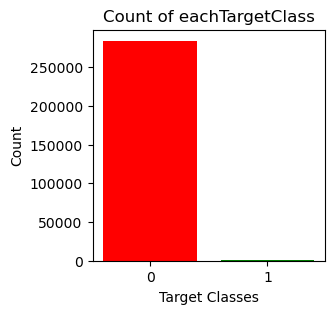

In [5]:
rcParams['figure.figsize'] = 3,3
plt.bar(df['Class'].unique(), df['Class'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of eachTargetClass')

In [ ]:
x =df.drop(['Class'], axis=1)
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)


In [9]:
hyper_param = {'criterion':['entropy'], 'max_depth':[4]}
tree_grid_param = GridSearchCV(DecisionTreeClassifier(), hyper_param, scoring='roc_auc', n_jobs=-1, cv=5, verbose=2)
tree_cross_valid = tree_grid_param.fit(x_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [12]:
print("Best Hyper Parameters:\n", tree_cross_valid.best_params_)
final_model = (tree_cross_valid.best_score_)
print ("Best score is: ", final_model)

Best Hyper Parameters:
 {'criterion': 'entropy', 'max_depth': 4}
Best score is:  0.9511611847969801


In [13]:
hyper_param = {'n_estimators':[3,4,5,6,10]}
tree_grid_param = GridSearchCV(BaggingClassifier(), hyper_param, scoring='roc_auc', n_jobs=-1, cv=5, verbose=2)
tree_cross_valid = tree_grid_param.fit(x_train, y_train)
print("Best Hyper Parameters:\n", tree_cross_valid.best_params_)
print ("Best score is: ", final_model)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyper Parameters:
 {'n_estimators': 10}
Best score is:  0.9511611847969801


In [ ]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

plt.rcParams.update({'font.size': 10})

fpr, tpr, thresholds = roc_curve(y_test.ravel(),y_pred)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()